In [1]:
from imblearn.over_sampling import SMOTE
from sklearn import base
smote = SMOTE(random_state=1337)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/kaakxixi/Documents/dxin/data/vip_lose2.csv')

data.rename(columns = lambda x: x.strip(), inplace=True)
print('data的列名： ',data.columns)
data.近90天消费品类[data.近90天消费品类.str.strip()==''] = '其他'
data.近90天消费商品[data.近90天消费商品.str.strip()==''] = '其他'
data.最近一次消费品类[data.最近一次消费品类.str.strip()==''] = '其他'
data.最近一次消费商品[data.最近一次消费商品.str.strip()==''] = '其他'

## 处理分类变量
dummy_cols = ['最近一次渠道','最近一次就餐方式','最近一次时段','商圈类型','区域名称','业态','经营类型',
              '近90天偏好时段', '近90天偏好渠道', '近90天偏好就餐方式',
               '最近一次消费品类', '近90天消费品类']
data = pd.get_dummies(data,columns=dummy_cols)

data['城市类型'] = data['城市类型'].map(lambda s:0 if s.strip()=='特一类' else 1 if s.strip()=='一类' else 2 if s.strip()=='二类' else 3 if s.strip()=='三类' else 4)
data['新既分类'] = data['新既分类'].map(lambda s:0 if s.strip()=='新开' else 1 if s.strip()=='新既' else 2 if s.strip()=='既有不足年' else 3)
data['近90天消费分段'] = data['近90天消费分段'].map(lambda s:s.strip()).replace(['0-50元','51-100元','100-150元','151-200元','201-500元','500+元'],[0,1,2,3,4,5])
data['近90天平均每次消费分段'] = data['近90天平均每次消费分段'].map(lambda s:s.strip()).replace(['0-20元','21-40元','41-60元','61-80元','81-100元','100+元'],[0,1,2,3,4,5])
data['近90天tc分段'] = data['近90天tc分段'].map(lambda s:s.strip()).replace(['1次','2-4次','5-7次','8-10次','10+次'],[0,1,2,3,4])
data['近90天活跃天数分段'] = data['近90天活跃天数分段'].map(lambda s:s.strip()).replace(['1天','2-4天','5-7天','8-10天','10+天'],[0,1,2,3,4])

# 删除不必要的列
member = data.member_id
data['lose'] = 1 - data['retent']
data.drop(['member_id','店铺','retent','公司名称','最近一次消费商品','近90天消费商品'],axis=1,inplace=True)
data[['城市类型', '新既分类','近90天消费分段','近90天平均每次消费分段','近90天tc分段','近90天活跃天数分段']].head()

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix

X = data.drop(['lose'],axis=1)
y = data['lose']
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)

print("X shape is: ",X.shape)
print("y shape is: ",y.shape)

X_resampled, y_resampled = smote.fit_resample(X, y)
print("X_resampled shape is: ",X_resampled.shape)
print("y_resampled shape is: ",y_resampled.shape)
y_resampled.value_counts()

data的列名：  Index(['最近一次渠道', '最近一次就餐方式', '最近一次时段', '店铺', '商圈类型', '城市类型', '新既分类', '区域名称',
       '公司名称', '业态', '经营类型', '近90天消费分段', '近90天平均每次消费分段', '近90天tc分段',
       '近90天活跃天数分段', '近90天消费金额', '近90天tc', '近90天活跃天数', '近90天偏好时段', '近90天偏好渠道',
       '近90天偏好就餐方式', '最近一次消费品类', '近90天消费品类', '最近一次消费商品', '近90天消费商品',
       'member_id', 'retent'],
      dtype='object')


<ipython-input-2-84ab259ada6e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.近90天消费品类[data.近90天消费品类.str.strip()==''] = '其他'
<ipython-input-2-84ab259ada6e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.近90天消费商品[data.近90天消费商品.str.strip()==''] = '其他'
<ipython-input-2-84ab259ada6e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.最近一次消费品类[data.最近一次消费品类.str.strip()==''] = '其他'
<ipython-input-2-84ab259ada6e>:13: Setti

X shape is:  (50972, 98)
y shape is:  (50972,)
X_resampled shape is:  (85100, 98)
y_resampled shape is:  (85100,)


0    42550
1    42550
Name: lose, dtype: int64

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


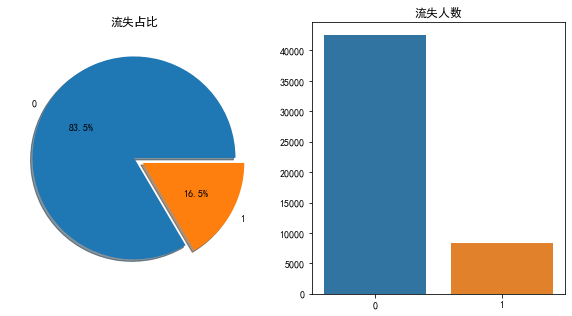

In [73]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['lose'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('流失占比')
ax[0].set_ylabel('')
sns.countplot('lose',data=data,ax=ax[1])
ax[1].set_title('流失人数')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.show()

In [13]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg
import lightgbm as lgb
kfold = KFold(n_splits=5) # k=5, split the data into 5 equal parts
xyz=[]
accuracy=[]
std=[]
acc=[]
pr=[]
rec=[]
f=[]
au=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest','Voting Classifier',
             'Bagging DecisionTree','AdaBoost','Gradient Boosting','XGBoost','LightGBM']
models=[LogisticRegression(C=0.1),
        KNeighborsClassifier(n_neighbors=10),
        DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=0),
        GaussianNB(),
        RandomForestClassifier(n_estimators=1000),
        VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              
                                              ('RFor',RandomForestClassifier(n_estimators=1000,random_state=0)),
                                              ('LR',LogisticRegression(C=0.1)),
                                              ('DT',DecisionTreeClassifier(random_state=0,max_depth=10, min_samples_leaf=100))
                                              
                                              
                                             ], 
                       voting='soft'),
       BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100),
       AdaBoostClassifier(learning_rate=0.05, n_estimators=1000,random_state=0),
       GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1),
       xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['logloss', 'auc', 'error'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, n_estimators=500),
        lgb.LGBMClassifier(learning_rate=0.01, n_estimators=500)
       ]
for i in models:
    model = i
    accuracy = cross_val_score(model,X_resampled,y_resampled, cv = kfold,scoring = "accuracy")
    precision = cross_val_score(model,X_resampled,y_resampled, cv = kfold,scoring = "precision")
    recall = cross_val_score(model,X_resampled,y_resampled, cv = kfold,scoring = "recall")
    f1 = cross_val_score(model,X_resampled,y_resampled, cv = kfold,scoring = "f1")
    auc = cross_val_score(model,X_resampled,y_resampled, cv = kfold,scoring = "roc_auc")
    acc.append(accuracy.mean())
    pr.append(precision.mean())
    rec.append(recall.mean())
    f.append(f1.mean())
    au.append(auc.mean())
    std.append(auc.std())
new_models=pd.DataFrame({'accuracy':acc,'precision':pr,'recall':rec,'f1':f,'auc':au,'std':std},index=classifiers)       
new_models

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py", line 627, in roc_auc_score
    return _average_binary_score(
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_base.py", line 75,

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and w

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py", line 627, in roc_auc_score
    return _average_binary_score(
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_base.py", line 75,

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboos

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._score_func(y, y_pred, **scoring_kwargs)
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py", line 627, in roc_auc_score
    return _average_binary_score(
  File "/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_base.py", line 75,

,accuracy,precision,recall,f1,auc,std
Logistic Regression,0.825029,0.597838,0.644114,0.614251,NaN,NaN
KNN,0.749130,0.577210,0.949434,0.660263,NaN,NaN
Decision Tree,0.780364,0.605757,0.691276,0.625363,NaN,NaN
Naive Bayes,0.723537,0.543668,0.850658,0.614144,NaN,NaN
Random Forest,0.894536,0.698456,0.654960,0.676238,NaN,NaN
Voting Classifier,0.847192,0.626286,0.813114,0.690546,NaN,NaN
Bagging DecisionTree,0.892385,0.691624,0.615313,0.648478,NaN,NaN
AdaBoost,0.818954,0.612258,0.727015,0.650181,NaN,NaN
Gradient Boosting,0.884360,0.672175,0.602019,0.633020,NaN,NaN
XGBoost,0.857062,0.634595,0.697769,0.660509,NaN,NaN


In [19]:
std=[]
au=[]
classifiers=['Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest','Voting Classifier',
             'Bagging DecisionTree','AdaBoost','Gradient Boosting','XGBoost','LightGBM']
models=[LogisticRegression(C=0.1),
        KNeighborsClassifier(n_neighbors=10),
        DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=0),
        GaussianNB(),
        RandomForestClassifier(n_estimators=1000),
        VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              
                                              ('RFor',RandomForestClassifier(n_estimators=1000,random_state=0)),
                                              ('LR',LogisticRegression(C=0.1)),
                                              ('DT',DecisionTreeClassifier(random_state=0,max_depth=10, min_samples_leaf=100))
                                              
                                              
                                             ], 
                       voting='soft'),
       BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100),
       AdaBoostClassifier(learning_rate=0.05, n_estimators=1000,random_state=0),
       GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1),
       xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['logloss', 'auc', 'error'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, n_estimators=500),
        lgb.LGBMClassifier(learning_rate=0.01, n_estimators=500)
       ]
for i in models:
    model = i
    auc = cross_val_score(model,X_resampled,y_resampled, cv = 5,scoring = "roc_auc")
    au.append(auc.mean())
    std.append(auc.std())
new_models2=pd.DataFrame({'auc':au,'std':std},index=classifiers)       
new_models2

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,auc,std
Logistic Regression,0.931256,0.084087
KNN,0.921980,0.028932
Decision Tree,0.886819,0.067728
Naive Bayes,0.869473,0.089454
Random Forest,0.966173,0.055718
Voting Classifier,0.962118,0.056807
Bagging DecisionTree,0.958284,0.073798
AdaBoost,0.938386,0.077076
Gradient Boosting,0.952388,0.088172
XGBoost,0.950598,0.076738


In [21]:
#Hyper-Parameter Tuning for SGB
from sklearn.model_selection import GridSearchCV
n_estimators=[100,500,1000]
learn_rate=[0.01,0.05,0.1,0.5,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=hyper,verbose=True,cv=5,scoring='roc_auc')
gd.fit(X_resampled,y_resampled)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
0.9523872239889203
GradientBoostingClassifier(n_estimators=500)


In [23]:
#Hyper-Parameter Tuning for DecisionTree
from sklearn.model_selection import GridSearchCV
max_depth=[10,50,100,200]
min_samples_leaf=[10,20,50,100]
hyper={'max_depth':max_depth,'min_samples_leaf':min_samples_leaf}
gd=GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=hyper,verbose=True,scoring='roc_auc',cv=5)
gd.fit(X_resampled,y_resampled)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.9227449824012947
DecisionTreeClassifier(max_depth=50, min_samples_leaf=20, random_state=0)


In [25]:
from sklearn.model_selection import GridSearchCV
C=[0.1,0.5,1,2,10]
hyper={'C':C}
gd=GridSearchCV(estimator=LogisticRegression(random_state=0),param_grid=hyper,verbose=True,scoring='roc_auc',cv=5)
gd.fit(X_resampled,y_resampled)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

0.9312557383930704
LogisticRegression(C=0.1, random_state=0)


/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Hyper-Parameter Tuning for RandomForest
from sklearn.model_selection import GridSearchCV
n_estimators=[10,100,500,1000,5000]
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True,scoring='roc_auc',cv=5)
gd.fit(X_resampled,y_resampled)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9662108226859669
RandomForestClassifier(n_estimators=5000, random_state=0)


In [4]:
#Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y,cv=5,scoring='roc_auc')
result2=cross_val_score(grad,X,y,cv=5,scoring='recall')
print('The cross validated auc score for Gradient Boosting is:',result.mean())
print('The cross validated recall score for Gradient Boosting is:',result2.mean())

The cross validated auc score for Gradient Boosting is: 0.7918563317125613
The cross validated recall score for Gradient Boosting is: 0.11434545416099859


In [7]:
#Stochastic Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X_resampled,y_resampled,cv=5,scoring='roc_auc')
result2=cross_val_score(grad,X_resampled,y_resampled,cv=5,scoring='recall')
print('The cross validated auc score for Gradient Boosting is:',result.mean())
print('The cross validated recall score for Gradient Boosting is:',result2.mean())

The cross validated auc score for Gradient Boosting is: 0.9523876299535626
The cross validated recall score for Gradient Boosting is: 0.8176968272620447


In [6]:
result2

array([0.11513353, 0.09614243, 0.11995249, 0.11104513, 0.12945368])

In [8]:
result2

array([0.12115159, 0.99095182, 0.99247944, 0.99153937, 0.99236193])

In [9]:
grad=DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=0)
result=cross_val_score(grad,X,y,cv=5,scoring='roc_auc')
result2=cross_val_score(grad,X,y,cv=5,scoring='recall')
print('The cross validated auc score for Decision Tree is:',result.mean())
print('The cross validated recall score for Decision Tree is:',result2.mean())
result_smp=cross_val_score(grad,X_resampled,y_resampled,cv=5,scoring='roc_auc')
result2_smp=cross_val_score(grad,X_resampled,y_resampled,cv=5,scoring='recall')
print('The cross validated auc score for Decision Tree is:',result_smp.mean())
print('The cross validated recall score for Decision Tree is:',result2_smp.mean())

The cross validated auc score for Decision Tree is: 0.7792659780268284
The cross validated recall score for Decision Tree is: 0.09997892540721894
The cross validated auc score for Decision Tree is: 0.8868185793723014
The cross validated recall score for Decision Tree is: 0.8080141010575794


In [10]:
result2_smp
result2

array([0.07952522, 0.09792285, 0.12589074, 0.08907363, 0.10748219])

In [11]:
result2_smp

array([0.40047004, 0.92091657, 0.91645123, 0.89706228, 0.90517039])

In [17]:
model = LogisticRegression(C=0.1)
cross_val_score(model,X_resampled,y_resampled, cv = 5,scoring = "roc_auc")

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

array([0.76316971, 0.9697926 , 0.97397512, 0.97150328, 0.97783798])

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

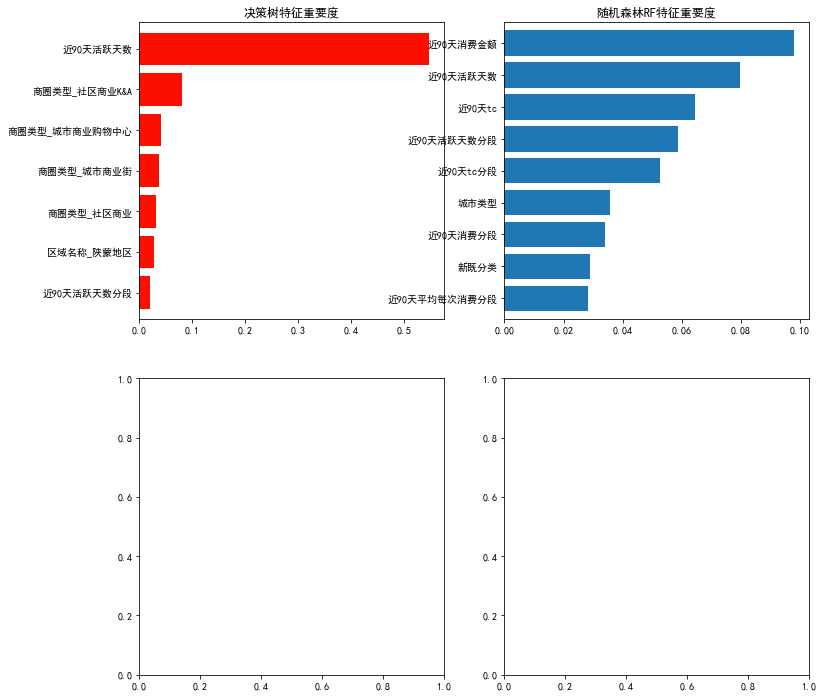

In [53]:
f,ax=plt.subplots(2,2,figsize=(12,12))
df_dt[df_dt>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0],color='#FD0F00')
ax[0,0].set_title('决策树特征重要度')

df_rf[df_rf>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1])
ax[0,1].set_title('随机森林RF特征重要度')



model_bag=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model_bag.fit(X_resampled,y_resampled)
df_bag = pd.Series(model_bag.feature_importances_,X_resampled.columns.str.strip())
df_bag[df_bag>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('决策树Bagging分类特征重要度')

df_xgb[df_xgb>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#aa11ff')
ax[1,1].set_title('XGBoost特征重要度')

plt.show()

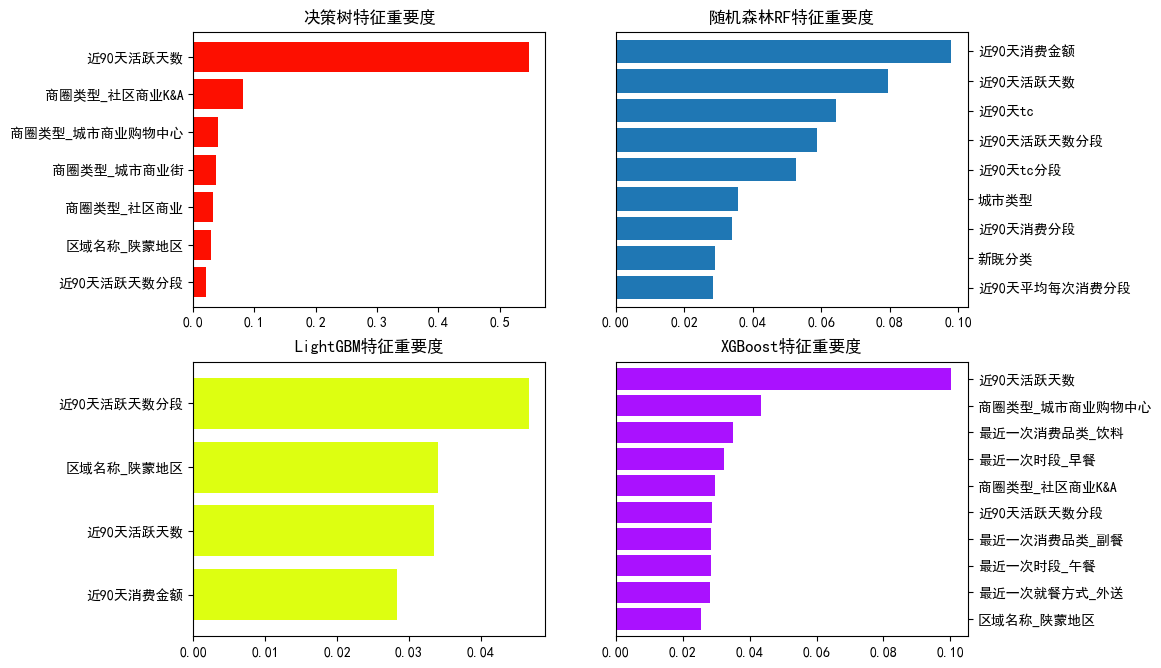

In [67]:
f,ax=plt.subplots(2,2,figsize=(10,8),dpi=100,facecolor="w")
df_dt[df_dt>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0],color='#FD0F00')
ax[0,0].set_title('决策树特征重要度')

df_rf[df_rf>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1])
ax[0,1].set_title('随机森林RF特征重要度')
ax[0,1].yaxis.tick_right()


df_lgb[df_lgb>=0.025].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],color='#ddff11')
ax[1,0].set_title('LightGBM特征重要度')

df_xgb[df_xgb>=0.025].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#aa11ff')
ax[1,1].set_title('XGBoost特征重要度')
ax[1,1].yaxis.tick_right()

plt.show()

KeyboardInterrupt: 

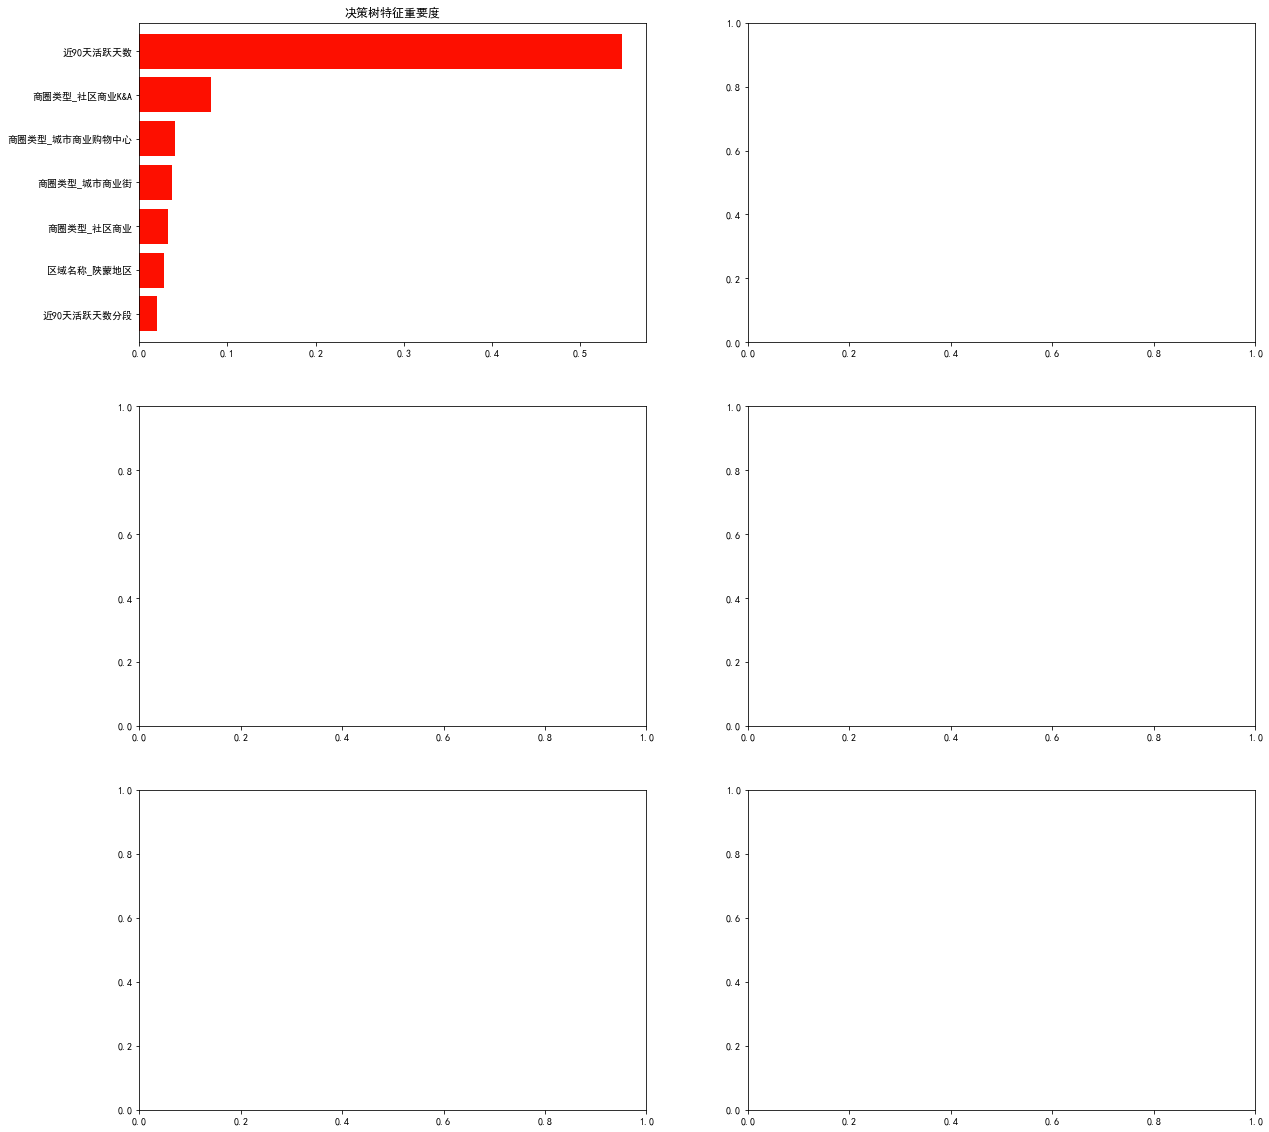

In [38]:
f,ax=plt.subplots(3,2,figsize=(20,20))
model_dt=DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=0)
model_dt.fit(X_resampled,y_resampled)
#A = pd.Series(model.coef_[0],X.columns.str.strip())
df_dt = pd.Series(model_dt.feature_importances_,X_resampled.columns.str.strip())
df_dt[df_dt>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0],color='#FD0F00')
ax[0,0].set_title('决策树特征重要度')

model_rf=RandomForestClassifier(n_estimators=1000,random_state=0)
model_rf.fit(X_resampled,y_resampled)
df_rf = pd.Series(model_rf.feature_importances_,X_resampled.columns.str.strip())
df_rf[df_rf>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1])
ax[0,1].set_title('随机森林RF特征重要度')

model_ada=AdaBoostClassifier(learning_rate=0.05, n_estimators=1000,random_state=0)
model_ada.fit(X_resampled,y_resampled)
df_ada=pd.Series(model_ada.feature_importances_,X_resampled.columns.str.strip())
df_ada[df_ada>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],color='#ddff11')
ax[1,0].set_title('AdaBoost特征重要度')

model_gb=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
model_gb.fit(X_resampled,y_resampled)
df_gb = pd.Series(model_gb.feature_importances_,X_resampled.columns.str.strip())
df_gb[df_gb>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],cmap='RdYlGn_r')
ax[1,1].set_title('梯度提升Gradient Boosting特征重要度')


model_xgb=xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['logloss', 'auc', 'error'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, n_estimators=500)
model_xgb.fit(X_resampled,y_resampled)
df_xgb = pd.Series(model_xgb.feature_importances_,X_resampled.columns.str.strip())
df_xgb[df_xgb>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[2,0],color='#aa11ff')
ax[2,0].set_title('XGBoost特征重要度')

model_lgb=lgb.LGBMClassifier(learning_rate=0.01, n_estimators=500)
model_lgb.fit(X_resampled,y_resampled)
df_lgb = pd.Series(model_lgb.feature_importances_ / model_lgb.feature_importances_.sum(),X_resampled.columns.str.strip())
df_lgb[df_lgb>=0.02].sort_values(ascending=True).plot.barh(width=0.8,ax=ax[2,1],cmap='#11f1ff')
ax[2,1].set_title('LightGBM特征重要度')
plt.show()

In [32]:
df_xgb.sort_values(ascending=True)

业态_德克士           0.000000
近90天消费品类_食品      0.000000
商圈类型_办公区         0.000000
业态_牛肉面           0.000000
经营类型_合作          0.000000
                   ...   
商圈类型_社区商业K&A     0.029676
最近一次时段_早餐        0.032228
最近一次消费品类_饮料      0.034993
商圈类型_城市商业购物中心    0.043485
近90天活跃天数         0.100347
Length: 98, dtype: float32

In [35]:
model_lgb.feature_importances_ / model_lgb.feature_importances_.sum()

array([0.02106667, 0.02486667, 0.        , 0.00706667, 0.02113333,
       0.04666667, 0.0284    , 0.0194    , 0.03353333, 0.01473333,
       0.0084    , 0.00686667, 0.00733333, 0.00086667, 0.        ,
       0.00133333, 0.0082    , 0.01066667, 0.0172    , 0.01133333,
       0.00173333, 0.0112    , 0.01046667, 0.01173333, 0.013     ,
       0.0116    , 0.        , 0.0124    , 0.00233333, 0.00526667,
       0.0212    , 0.0198    , 0.0098    , 0.00886667, 0.02193333,
       0.0214    , 0.02493333, 0.01826667, 0.02033333, 0.02213333,
       0.01913333, 0.01926667, 0.02173333, 0.01386667, 0.02406667,
       0.034     , 0.01653333, 0.02093333, 0.        , 0.002     ,
       0.00666667, 0.        , 0.        , 0.01493333, 0.00166667,
       0.0132    , 0.01073333, 0.0122    , 0.01413333, 0.01153333,
       0.00926667, 0.0048    , 0.00526667, 0.00113333, 0.0016    ,
       0.00113333, 0.00273333, 0.00266667, 0.00773333, 0.01006667,
       0.00846667, 0.        , 0.00893333, 0.0058    , 0.0126 

In [37]:
df_gb.sort_values(ascending=True)

业态_德克士           0.000000
近90天消费品类_预包装     0.000000
近90天消费品类_外送费     0.000000
近90天消费品类_其他      0.000000
近90天消费品类_免费赠品    0.000000
                   ...   
区域名称_陕蒙地区        0.033691
商圈类型_社区商业        0.036549
商圈类型_城市商业街       0.045265
近90天活跃天数分段       0.047702
近90天活跃天数         0.350237
Length: 98, dtype: float64

In [ ]:



LogisticRegression(C=0.1),
        KNeighborsClassifier(n_neighbors=10),
        DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=0),
        GaussianNB(),
        RandomForestClassifier(n_estimators=1000),
        VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RFor',RandomForestClassifier(n_estimators=1000,random_state=0)),
                                              ('LR',LogisticRegression(C=0.1)),
                                              ('DT',DecisionTreeClassifier(random_state=0,max_depth=10, min_samples_leaf=100)) 
                                             ], voting='soft'),
       BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100),
       AdaBoostClassifier(learning_rate=0.05, n_estimators=1000,random_state=0),
       GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1),
       xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['logloss', 'auc', 'error'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, n_estimators=500),
        lgb.LGBMClassifier(learning_rate=0.01, n_estimators=500)

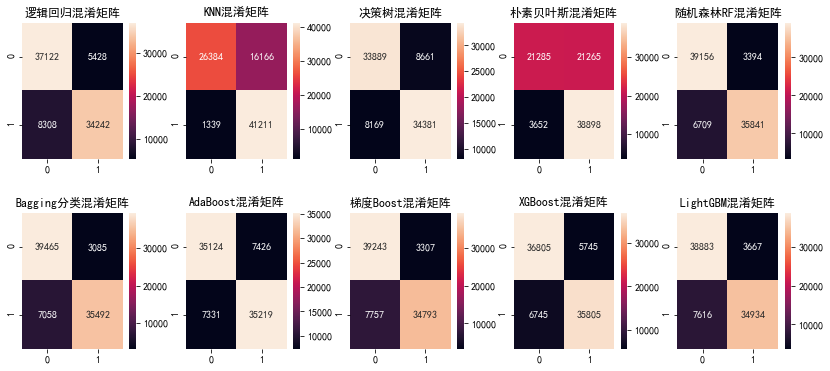

In [48]:
f,ax=plt.subplots(nrows = 2,ncols=5,figsize=(14,6))
sns.heatmap(confusion_matrix(y_resampled,y_pred_lr),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('逻辑回归混淆矩阵')

sns.heatmap(confusion_matrix(y_resampled,y_pred_kn),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('KNN混淆矩阵')

sns.heatmap(confusion_matrix(y_resampled,y_pred_dt),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('决策树混淆矩阵')

sns.heatmap(confusion_matrix(y_resampled,y_pred_nb),ax=ax[0,3],annot=True,fmt='2.0f')
ax[0,3].set_title('朴素贝叶斯混淆矩阵')

sns.heatmap(confusion_matrix(y_resampled,y_pred_rf),ax=ax[0,4],annot=True,fmt='2.0f')
ax[0,4].set_title('随机森林RF混淆矩阵')


sns.heatmap(confusion_matrix(y_resampled,y_pred_bag),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Bagging分类混淆矩阵')

sns.heatmap(confusion_matrix(y_resampled,y_pred_ada),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('AdaBoost混淆矩阵')

sns.heatmap(confusion_matrix(y_resampled,y_pred_gb),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('梯度Boost混淆矩阵')

sns.heatmap(confusion_matrix(y_resampled,y_pred_xgb),ax=ax[1,3],annot=True,fmt='2.0f')
ax[1,3].set_title('XGBoost混淆矩阵')

sns.heatmap(confusion_matrix(y_resampled,y_pred_lgb),ax=ax[1,4],annot=True,fmt='2.0f')
ax[1,4].set_title('LightGBM混淆矩阵')

plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

/Users/kaakxixi/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


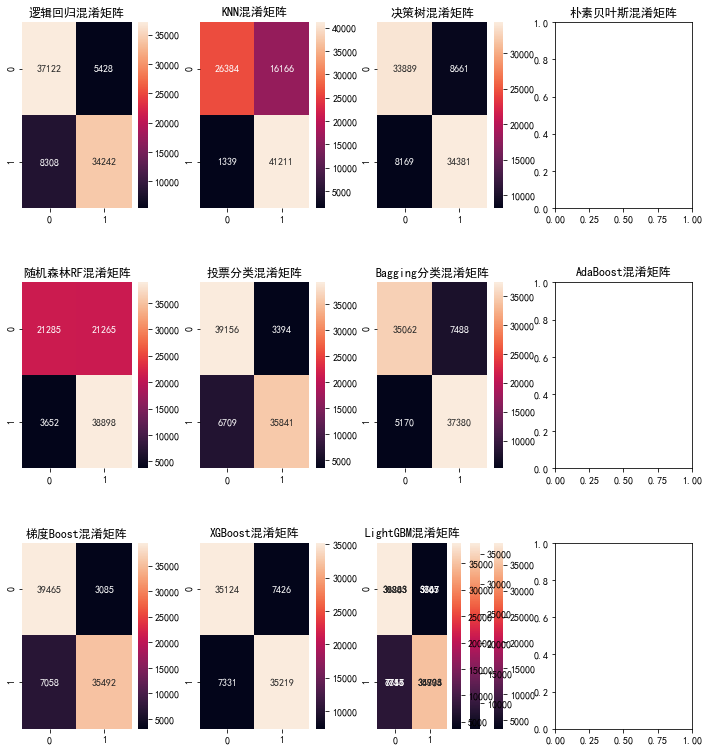

In [26]:
f,ax=plt.subplots(nrows = 3,ncols=4,figsize=(12,13))
y_pred_lr = cross_val_predict(LogisticRegression(C=0.1),X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_lr),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('逻辑回归混淆矩阵')

y_pred_kn = cross_val_predict(KNeighborsClassifier(n_neighbors=10),X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_kn),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('KNN混淆矩阵')

y_pred_dt = cross_val_predict(DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=0),X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_dt),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('决策树混淆矩阵')

y_pred_nb = cross_val_predict(GaussianNB(),X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_nb),ax=ax[1,0],annot=True,fmt='2.0f')
ax[0,3].set_title('朴素贝叶斯混淆矩阵')

y_pred_rf = cross_val_predict(RandomForestClassifier(n_estimators=1000),X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_rf),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,0].set_title('随机森林RF混淆矩阵')

y_pred_vt = cross_val_predict(VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              
                                              ('RFor',RandomForestClassifier(n_estimators=1000,random_state=0)),
                                              ('LR',LogisticRegression(C=0.1)),
                                              ('DT',DecisionTreeClassifier(random_state=0,max_depth=10, min_samples_leaf=100))
                                              
                                              
                                             ], 
                       voting='soft'),X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_vt),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,1].set_title('投票分类混淆矩阵')


y_pred_bag = cross_val_predict(BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
                           ,X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_bag),ax=ax[2,0],annot=True,fmt='2.0f')
ax[1,2].set_title('Bagging分类混淆矩阵')

y_pred_ada = cross_val_predict(AdaBoostClassifier(learning_rate=0.05, n_estimators=1000,random_state=0),X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_ada),ax=ax[2,1],annot=True,fmt='2.0f')
ax[1,3].set_title('AdaBoost混淆矩阵')

y_pred_gb = cross_val_predict(GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1),X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_gb),ax=ax[2,2],annot=True,fmt='2.0f')
ax[2,0].set_title('梯度Boost混淆矩阵')

y_pred_xgb = cross_val_predict(xg.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['logloss', 'auc', 'error'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, n_estimators=500),X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_xgb),ax=ax[2,2],annot=True,fmt='2.0f')
ax[2,1].set_title('XGBoost混淆矩阵')

y_pred_lgb = cross_val_predict(lgb.LGBMClassifier(learning_rate=0.01, n_estimators=500),X_resampled,y_resampled,cv=5)
sns.heatmap(confusion_matrix(y_resampled,y_pred_lgb),ax=ax[2,2],annot=True,fmt='2.0f')
ax[2,2].set_title('LightGBM混淆矩阵')

plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()